In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
data = pd.read_csv("fraudTest.csv")

In [4]:
data.shape

(555719, 23)

In [5]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

Inspecting the structure of the DataSet
3.1 understand the shape of the dataset
3.2 check the datatypes of the columns
3.3 check any missing values are present in the dataset
3.4 look at the head of the dataframe
3.5 inspect the target variable distribution

In [7]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [9]:
len(data)

555719

In [13]:
X = data.drop('is_fraud', axis=1)

In [8]:

y=data['is_fraud']


In [14]:
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
# inspectinng the target variable

,count,distribution
genuine,553574,99.614014
fraud,2145,0.385986


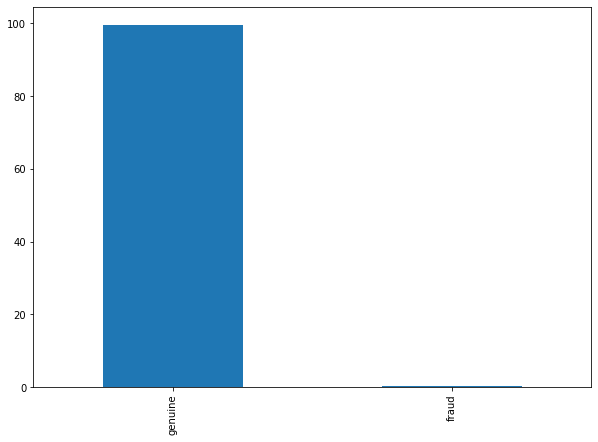

In [15]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

# Inference on inspecting the dataset :

There are 24 columns in the dataframe (including the unnamed 0 and split-label columns)
Target varible is is_fraud
Some of the variables reqires type-casting before further proceeding, for example trans_date_trans_time and dob are currently string-columns which need to be type-casted to pandas datetime object
No null values present in the dataset (all columns - all values are available for train as well as the test datasets)


# Inference on Inspecting the Target variable:

The dataset id Severely imbalanced, hence there is a class imbalance problem
The majority class, the non-fraud class contributes about 99.42 %
The minority class, in this case the positive class fraud contributes only 0.58%



# What we can do :

we should involve nesecceary proceses to mitigate the class imbalance problem like SMOTE or ADASYS
Choose the right metric for evaluating the model
In the given context, any random model can predict the classes with 99 % accuracy, hence accuracy is not the right metric to evaluate the model, we should go for the roc_auc instead , which is the measureof TruePostive and TrueNegative.

# .Basic Data Cleaning
4.1 Drop the duplicate records in the train dataset
4.2 Type cast the varibles wherever required
4.3 Lets check the cardinality of the category columns
4.4 Transform the the categprical columns to reduce the cadinality
4.5 Select and drop the reduntant columns

# Drop the duplicated records

In [16]:
# check for the duplicated records.
data.duplicated().sum()


0

# Type cast the necessary variables

In [17]:
# trans_date_trans_time to pandas datetime

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2020-06-21 12:14:25
1   2020-06-21 12:14:33
2   2020-06-21 12:14:53
Name: trans_date_trans_time, dtype: datetime64[ns]

In [18]:
# dob to pandas datetime

data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head(3)

0   1968-03-19
1   1990-01-17
2   1970-10-21
Name: dob, dtype: datetime64[ns]

Lets look at the cardinality of the varibles in the dataframe

In [19]:
cat_cols = data.select_dtypes(include = 'object').columns # selecting the categorical columns

for col in cat_cols:
    data[col] = data[col].str.lower().str.strip() 
    # cleaning the categorical columns with strings methods
    data[cat_cols].nunique().sort_values()


4.4 Choosing the columns to be Dropped

indexes/record id's
customer labels such as name, job ( job is highly cardinal cannot be grouped)
merchant labels such as merchant name
other categorical columns with high cadinalities which cannot be grouped / cannot be encoded

In [20]:
drop_cols = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job'] # list of columns to be dropped
data.drop(drop_cols, axis =1, inplace = True)
list(data.columns) # printing the remaining columns after droppin

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud']

Feature Extraction ( Arriving New Features )
5.1. Extract features from trans_date_trans_time
5.2. Extract features from unix_time
5.3. Extract features from dob
5.4. Extract features from merchant lat-long and card holder lat-long
5.5. Delete the reduntant features after feature extraction

In [21]:
# extract the transaction hour column

data['trans_hour'] = data['trans_date_trans_time'].dt.hour  # extracting the hour component using the dt accessor

data['trans_hour'].unique() # printing the unique values in the extracted series

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,  0,  1,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11])

In [22]:
# extract transaction month column

data['trans_month'] = data['trans_date_trans_time'].dt.month # extracting the month number component using the dt accessor

data['trans_month'].unique() # printing the unique values in the extracted series


array([ 6,  7,  8,  9, 10, 11, 12])

In [23]:
# the extract the boolean if the date of transaction is weekend or not

data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_name() # extracting the day name component using the dt accessor

data['trans_dayofweek'].unique() # printing the unique values in the extracted series

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

5.2 Features from unix_time

Note: unitx time is the date and time representation widely used in computing. It measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the beginning of the Unix (Unix OS) epoch.

calculate the time delay between the previouse and currant transaction


In [25]:
# lets look at the summary of the creit card transactions

data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     924
mean      601
std       329
min         6
25%       252
50%       634
75%       859
max      1474
Name: cc_num, dtype: int64

Inference :

There are 924 credt cards transaction are recorded
Each credict card has been utilised mutiple times (average of 601 times)
min - 6 times , max - 1474 times
Hence it is important to understand the delay betweem the previouse transaction and the current transaction for a credit cards in each record

In [26]:
# sort the dataframe on transaction datetime & cc_num

data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [28]:
# unix_time for the previouse transaction using the shift method in pandas

data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [29]:
# For the first transactions-records all the credit cards, the previouse unit time will be null
# we dont want any null values to be present in the variable as we are going to feed the dataset into machine learning models where null values are not expected
# for all the rows with null values, we are filling with the current unit time value - 86400 (number of seconds in a day)

data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)

In [30]:
# calculatig the time delay between the previouse and current transaction - converting the variable into to mins

data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60


5.3 Features from dob

Age of the card holder

In [31]:
# lets look the variable

data['dob'].head()


157    1986-02-17
741    1986-02-17
3047   1986-02-17
4351   1986-02-17
7695   1986-02-17
Name: dob, dtype: datetime64[ns]

calculating the age at the date of the transaction = dob - trans_date_trans_time

In [32]:
data['cust_age'] = (data['trans_date_trans_time'] - data['dob']).astype('timedelta64[Y]') # calculting the age in days and converting it into years

data['cust_age'].head() # lets look at the newly arrived age column

157     34.0
741     34.0
3047    34.0
4351    34.0
7695    34.0
Name: cust_age, dtype: float64

5.4 Features from merchant lat-log and card holder lat-long

lat distance between the customer loctaion and merchant location
long distance between the customer loctaion and merchant location
lat distance between the current merchant location and the previous merchant location
long distance between the current merchant location and the previous merchant location


In [33]:
#Calculate the lat distance between the customer and current merchant

data['lat_dist_cust_merch'] = (data['lat'] -data['merch_lat']).abs()
data['lat_dist_cust_merch'].head(3)


157     0.059274
741     0.811670
3047    0.927924
Name: lat_dist_cust_merch, dtype: float64

In [34]:
# Calculate the long distance between the customer and current merchant

data['long_dist_cust_merch'] = (data['long'] -data['merch_long']).abs()
data['long_dist_cust_merch'].head(3)

157     0.365499
741     0.214346
3047    0.803394
Name: long_dist_cust_merch, dtype: float64

In [35]:
# Get the lat and long values of the previouse merchan

data['prev_merch_lat'] = data.groupby(by = ['cc_num'])['merch_lat'].shift(1) # latitude of the previouse merchant with pandas shift method

data['prev_merch_long'] = data.groupby(by = ['cc_num'])['merch_long'].shift(1) # longitude of the previouse merchant with pandas shift method

In [36]:
# Fill the null values ( for all initial transctions 999 numbers ) with the lat long values of the current merchant

data['prev_merch_lat'].fillna(data['merch_lat'], inplace = True)

data['prev_merch_long'].fillna(data['merch_long'], inplace = True)


In [37]:
#Calculate the distnace between the current and the previouse merchant
data['lat_dist_prev_merch'] = (data['merch_lat'] - data['prev_merch_lat']).abs() # calculate and convert into absolute value

data['lat_dist_prev_merch'].head(3) # lets look at the newly arrived variable 

157     0.000000
741     0.752396
3047    1.739594
Name: lat_dist_prev_merch, dtype: float64

In [38]:
# Calculate the distnace between the current and the previouse merchant

data['long_dist_prev_merch'] = (data['merch_long'] -data['prev_merch_long']).abs() # calculate and convert into absolute value

data['long_dist_prev_merch'].head(3) # lets look at the newly arrived variable 


157     0.000000
741     0.151153
3047    1.017740
Name: long_dist_prev_merch, dtype: float64

5.5 Delete the redundant Features / Columns

trans_date_trans_time
cc_num
unix_time
unix_time_prev_trans
dob
lat
long
merch_lat
merch_long
prev_merch_lat
prev_merch_long


In [39]:
# list of the columns to be dropped

drop_cols2 = ['trans_date_trans_time','cc_num','unix_time','unix_time_prev_trans','lat',
              'long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob','city']


In [40]:
# Dropping the list of columns which are now redundant in the dataset
data.drop(drop_cols2, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns) # lets look at the remaining list of columns

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'trans_hour',
 'trans_month',
 'trans_dayofweek',
 'timedelta_last_trans',
 'cust_age',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

6.Variable Analysis and Visualization
6.1 create the subset dataframes for fraud and normal transactions for ease the exploration
6.2 creare the necessary functions so that those can be using over and again
6.3 visualization and inferences

6.1 create subset of dataframes

In [41]:
all_trans = data.copy() # create a copy dataset fof the base dataset

all_trans['class'] = all_trans['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) # mapping the classes 0 & 1 to genuine and fraud

normal = all_trans[data['is_fraud'] == 0] # create the normal transaction dataset

fraud = all_trans[data['is_fraud'] == 1] # create a fruad transaction dataset

6.2 create functions for peformimg the analysis

function to show simple stats by class
function to show simple stats by variable
function plot the box plots
function to normaize the count by the class

In [43]:
# Function to show simple stats by class
def stats_by_class(variable):
    stat_grid = all_trans.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
    stat_grid = stat_grid.transpose().round(2)
    return stat_grid

In [44]:
#Fuction to show simple stats by variable

def stats_by_var(variable):
    n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
    f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
    return pd.concat([n,f], axis = 1).transpose()


In [45]:
# Functing for plotting the boxplot
def plot_box (data, x, y, title , width = 10, height = 7):
    plt.figure(figsize = [width,height])
    sns.boxplot(data = data, x = x, y = y)
    plt.title(title);

In [47]:
# Function for plotting the normalized the count by class

def normalize_count_by_class(variable, width = 20, height = 7):
    plt.figure(figsize = [width,height])
    normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 

    normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions

    plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
  
    sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
    plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
    plt.xticks(rotation = 30);

    summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

    summary_table.columns = [variable, 'normal', 'fraud']
  
    summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

    summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)
    del normalized_normal,normalized_fraud,plot_table # delating the temperory varibale created in the function

    print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
  
    return summary_table

In [48]:
# choosing ggplot as the default plotting style

plt.style.use('ggplot')


6.3 Visualizations and Inferences

6.3.A ) is_fraud Class Distribution

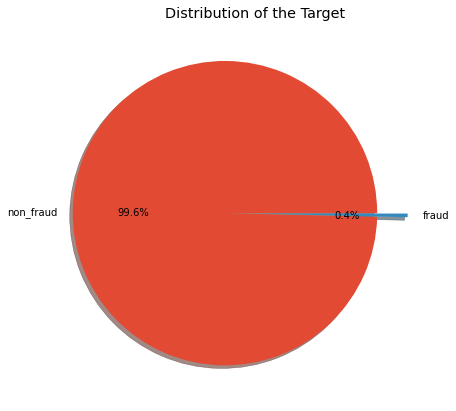

In [49]:
plt.figure(figsize = [7,7])
plot_var = all_trans['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True) # plotting the pie chart
plt.title('Distribution of the Target');

Inference :

The classes are highly imbalanced, 96 % of the class belongs to normal transactions, and only 0.4 % contributes to the fraud transaction.

6.3.B ) Gender of the card holder by class

,f,m
normal,54.87,45.13
fraud,54.27,45.73


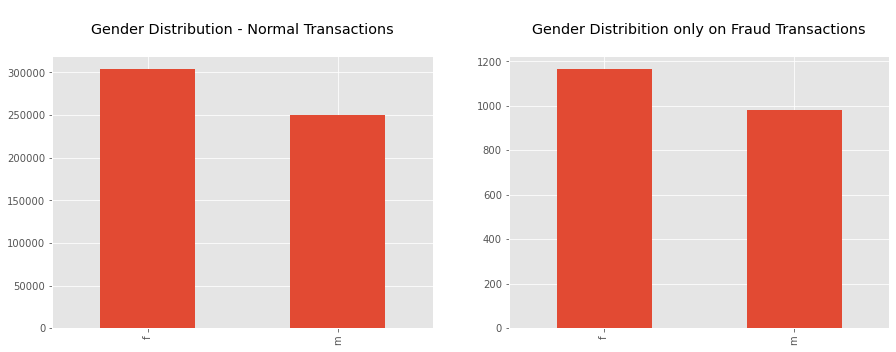

In [51]:
# plot gender count vs taget class

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')

# plot gender count in fraud class

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

stats_by_var('gender') # calling the stats by var function for the gender variable


Inference :

The fraud transaction is similarly distributed amoung male and female card holders.

Age of the Card Holder



class,Fraud,Non_Fraud
amin,18.00,15.00
amax,95.00,96.00
mean,48.45,46.38
median,47.00,44.00


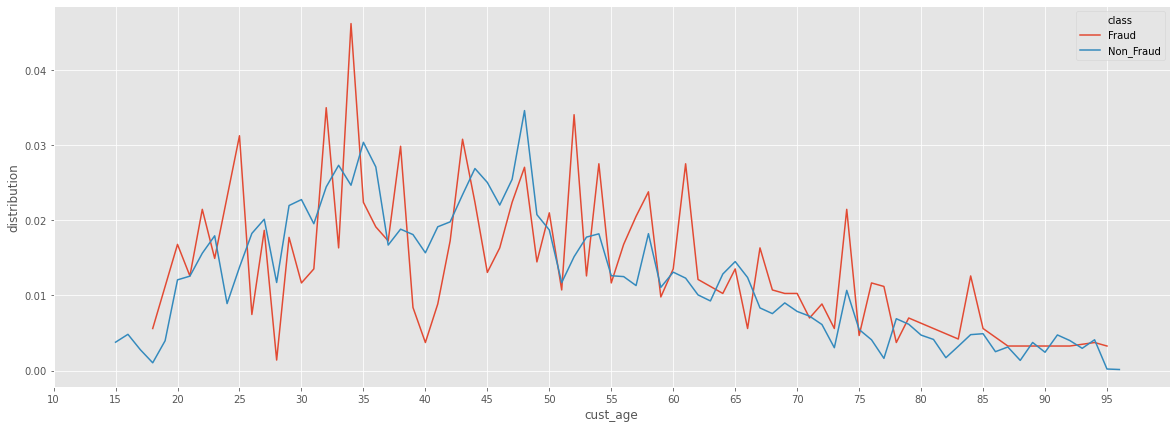

In [52]:
plt.figure(figsize = [20,7])

trans_hour_distribution = all_trans.groupby('class')['cust_age'].value_counts(normalize = True).rename('distribution').reset_index() # count by customer age

sns.lineplot(data = trans_hour_distribution, x = 'cust_age', y = 'distribution', hue = 'class') # plotting the line plot with hue = class

plt.xticks(np.arange(10,100,5)); # modifying the xticks

stats_by_class('cust_age') # calling the stats by class function for cust_age varaible

Inference :

The transctions are majorly from people whose age is in the range of 30 - 50.

The Fraad transaction are majorly concentrated for those card holders whose are age ranges between 45 - 60

# Amount of Transactions

class,Fraud,Non_Fraud
amin,1.78,1.00
amax,1320.92,22768.11
mean,528.36,67.61
median,371.94,47.15


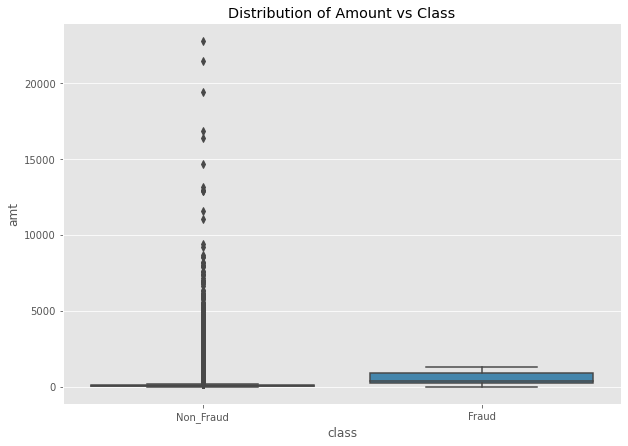

In [53]:
plot_box(all_trans,'class','amt','Distribution of Amount vs Class'); # calling the boxplot function

stats_by_class('amt') # calling the stats_by class function

Inferences :

The mean value of the fraud transactins seems to be high ~ 530$ where normal transctions is the 67
from the boxplot it is very clear that the fraud transaction does not have ourlier amount but the a mjority is heavily concentrated with median of 390 which is very high from the normal transactions

Hour of Transactions

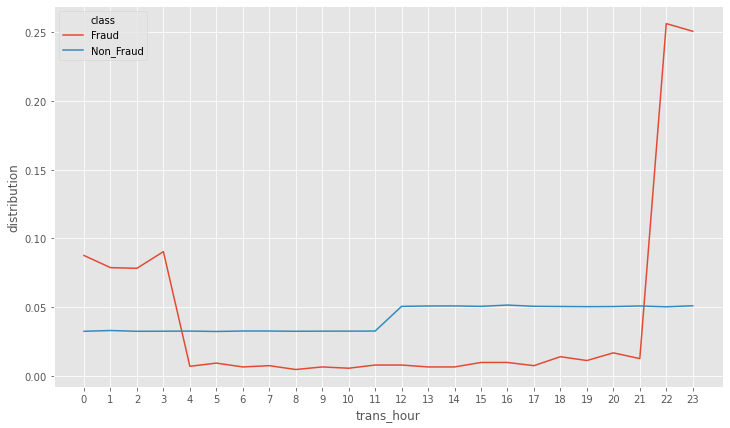

In [54]:
plt.figure(figsize = [12,7])

trans_hour_distribution = all_trans.groupby('class')['trans_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'trans_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

Inferences :

Normal Transactions are distributed similarly over the hours with slight increase from 11th hour and maintatinig the same till 23rd hour
Fraud Transactions are majorly taking place between 21st hour - 04 hour
In other words, fraud transactions are happening in mid-nigh when the geniune card holders are sleeping and unable to get notified on the transaction messages

Delay Between each Transactions --- Univariate Analysis

class,Fraud,Non_Fraud
amin,0.00,0.00
amax,5674.00,18949.00
mean,348.76,456.05
median,83.00,231.00


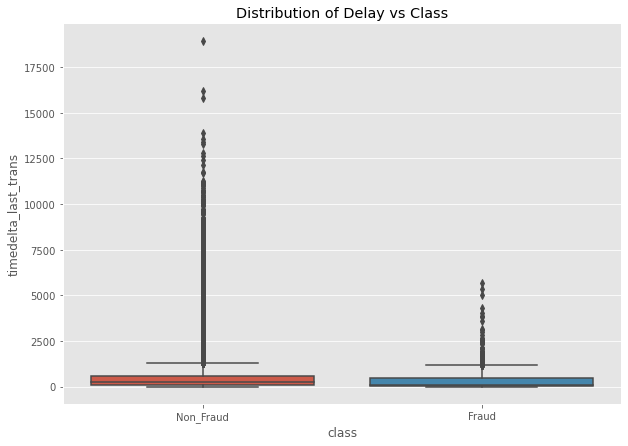

In [55]:
plot_box(all_trans,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

Inference :

The Successive fraud transactions are quicky happenin compared to the other transactions

The Weekday of the Transaction




Normalized frequency of < trans_dayofweek > on both classes and the percentage diffrence



,trans_dayofweek,normal,fraud,diff in %
0,Monday,20.744110,14.079254,-6.664856
1,Tuesday,19.831495,15.431235,-4.400260
2,Sunday,16.750064,17.435897,0.685833
4,Saturday,11.200671,12.400932,1.200262
3,Friday,11.291896,13.846154,2.554258
6,Wednesday,9.497195,12.400932,2.903738
5,Thursday,10.684570,14.405594,3.721025


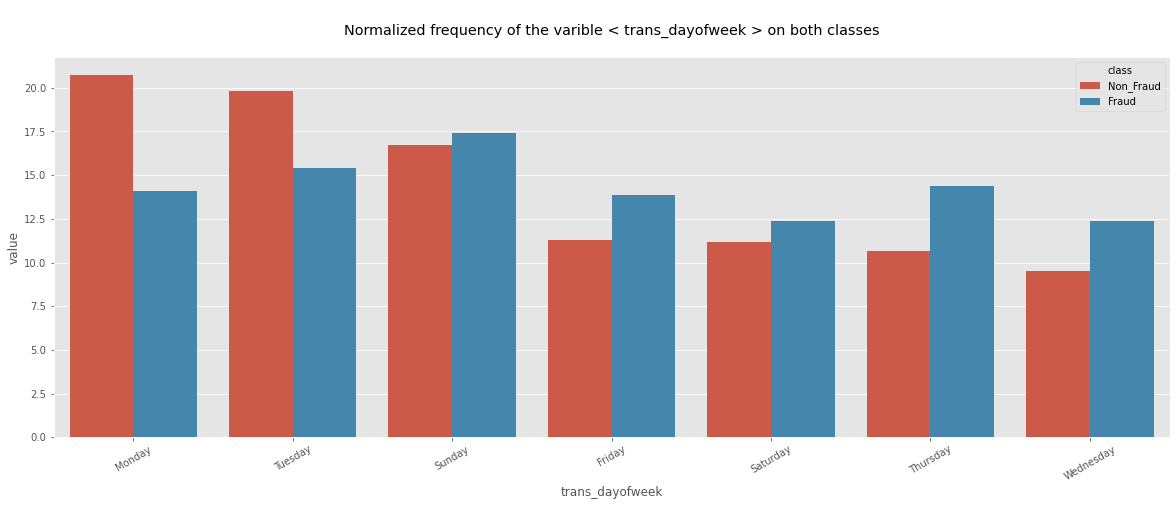

In [56]:
normalize_count_by_class('trans_dayofweek')


Inference :

The normalized percentage of the fraud transactions seems to be slight higher in wednesday, thursday, frid

Lat Distance between Customer & Merchant

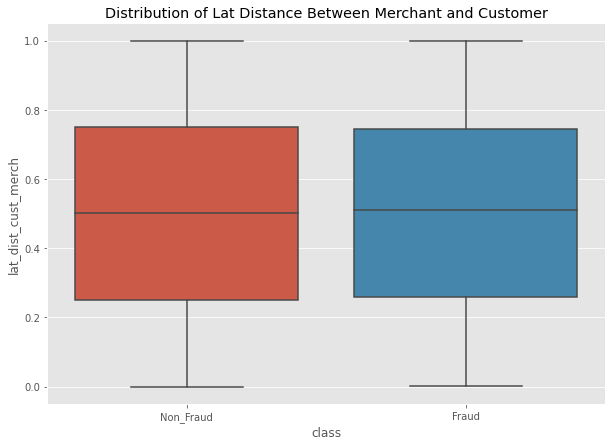

In [57]:
plot_box(all_trans,'class','lat_dist_cust_merch','Distribution of Lat Distance Between Merchant and Customer'); # calling the boxplot function

Inference :

There is no any observable difference in the overall distribution in the lat diatsnce between the customer and the merchant

Long Distance between Customer & Merchant



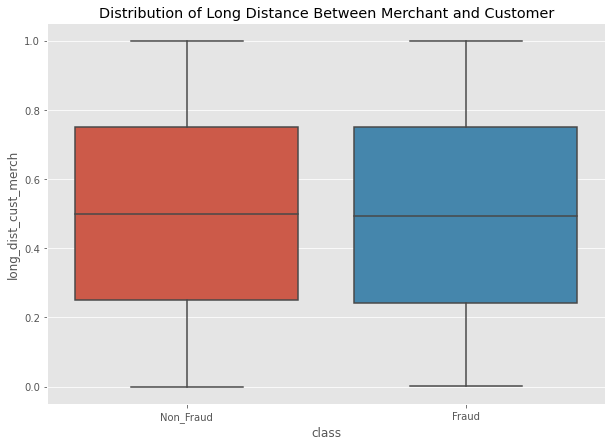

In [59]:
plot_box(all_trans,'class','long_dist_cust_merch','Distribution of Long Distance Between Merchant and Customer'); # calling the boxplot function


Inference :

There is no any observable difference in the overall distribution in the long diatsnce between the customer and the merchan


Lat Distance between Current Customer & Prev-Merchant

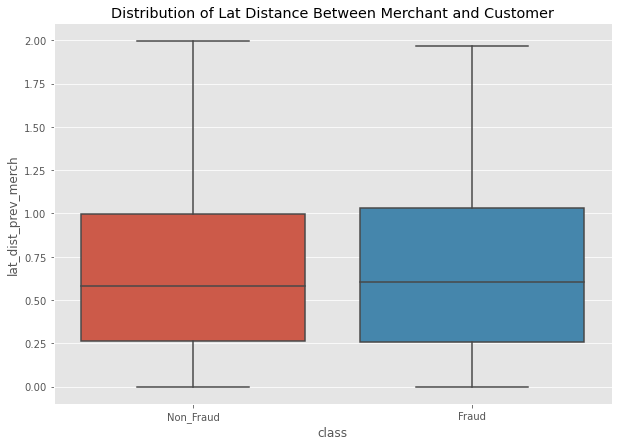

In [61]:
plot_box(all_trans,'class','lat_dist_prev_merch','Distribution of Lat Distance Between Merchant and Customer');

Inference :

There is no any observable difference in the overall distribution in the lat diatsnce between the current and the previouse merchant

Long Distance between Current Customer & Prev-Merchant



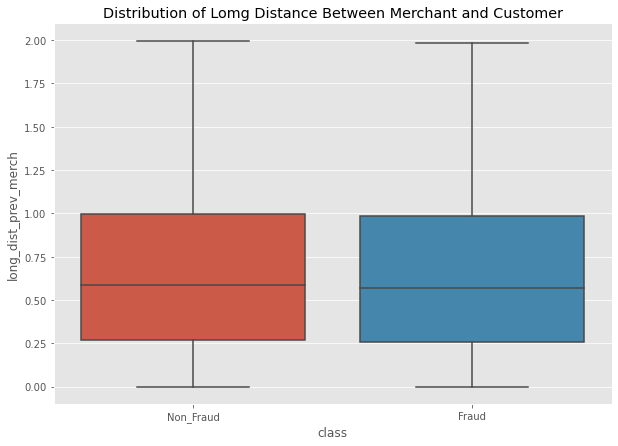

In [62]:
plot_box(all_trans,'class','long_dist_prev_merch','Distribution of Lomg Distance Between Merchant and Customer');

Inference :

There is no any observable difference in the overall distribution in the long diatsnce between the current and the previouse merchant


Normalized frequency of < category > on both classes and the percentage diffrence



,category,normal,fraud,diff in %
1,home,9.443724,3.123543,-6.320181
4,kids_pets,8.784191,3.030303,-5.753888
8,food_dining,7.083786,2.517483,-4.566304
6,entertainment,7.233902,2.750583,-4.483319
9,health_fitness,6.615556,2.424242,-4.191314
7,personal_care,7.091554,3.263403,-3.828151
0,gas_transport,10.155101,7.179487,-2.975614
10,misc_pos,6.232590,3.356643,-2.875947
12,grocery_net,3.501790,1.911422,-1.590368
13,travel,3.144837,1.864802,-1.280035


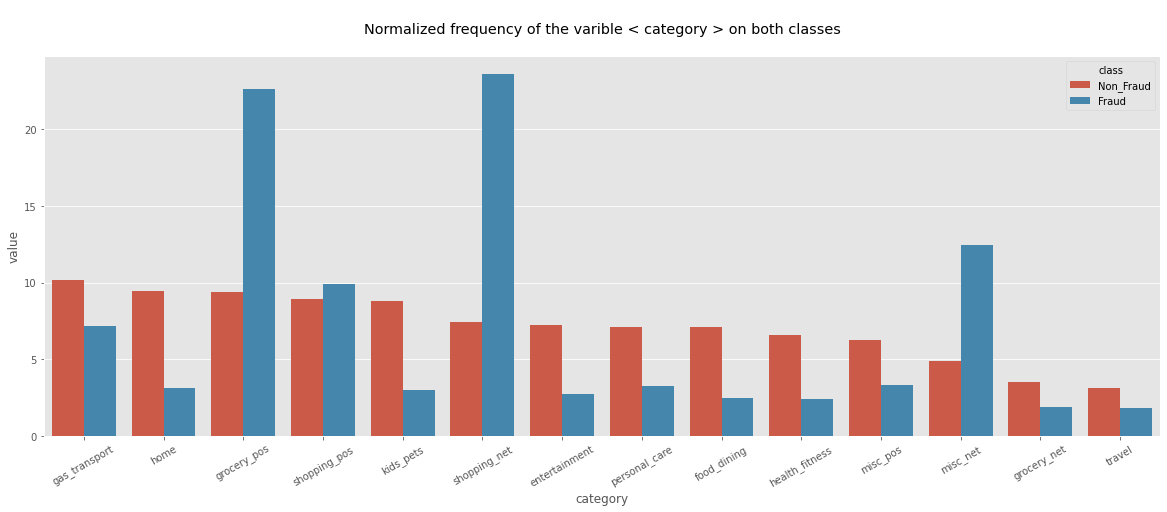

In [63]:
#Category of Item/Service Purchased
normalize_count_by_class('category')


Inference :

The normalized percentage of the grocery_pos, shopping_pos, shopping_net, misc_net are higher for frad transactions



Normalized frequency of < state > on both classes and the percentage diffrence



,state,normal,fraud,diff in %
0,tx,7.276353,5.268065,-2.008288
4,oh,3.632396,1.818182,-1.814214
28,wy,1.525541,0.419580,-1.105961
35,co,1.062911,0.093240,-0.969671
2,pa,6.180204,5.314685,-0.865518
11,ar,2.429666,1.585082,-0.844585
3,ca,4.346122,3.543124,-0.802998
7,fl,3.260811,2.470862,-0.789948
5,mi,3.542435,2.843823,-0.698612
26,la,1.619657,1.025641,-0.594016


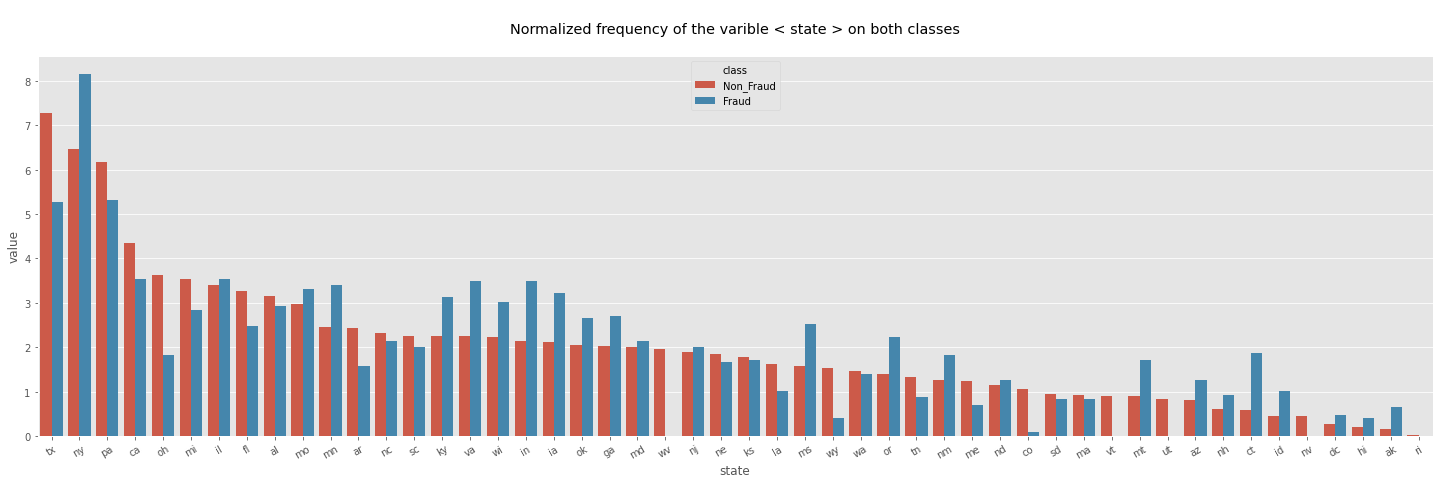

In [64]:
#State

normalize_count_by_class('state', width = 25)

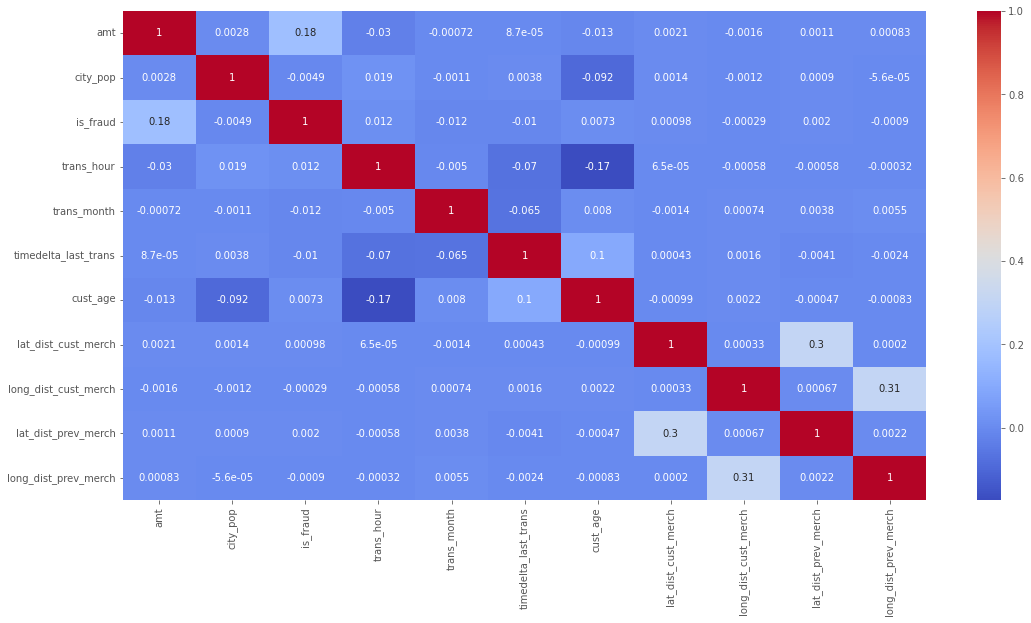

In [65]:
#Correlation Matrix between the variables


fig = plt.figure(figsize=(18,9))
sns.heatmap(all_trans.corr(),cmap='coolwarm', annot=True)
plt.show()


Inference :

There is not much visible correlations are seen.

Data Preprocessing
7.1 Splitting the train and test data sets
7.2 Create a symmetric train dataset based on the target variable
7.3 Outlier handing
7.4 Categorical Encoding
7.5 Variable Transformation
7.7 Feature Scalling.


In [66]:
X = data.drop('is_fraud', axis=1)
y=data['is_fraud']
from sklearn.model_selection import train_test_split
    
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

 Create a Symmetric train Dataset For Preprocessing

Note : Since the data is highly imbalanced, all the operations like encoding, transformations, scalling and outlier handling can get hugly biased by the train dataset

Strategy :

Let us resample the traing data into a symmetric train dataset using the sklearn resample class (with 50 : 50 class distribution)
Learn the parameters from the bench mark values from the symmetric dataset (train- symmetric)
Apply the transformations to the real train and test datasets
Why Skleran Resample at This stage

since the dataset having lot of non-numerical variable, another oversampling methods will not work out at this stage
Generating a bootstrap sample of a dataset for use in statistical estimation or hypothesis testing
We will use the SMOTE or ADASYN later during the model building stage, ie, once all variable are converved to numbers and all the preprocessing are done

7.3 Categorical Encoding Encoding

Objective : To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality

Steps

Check the cardinality of the variables
Choose the encoding type
Execute the encoding

In [69]:
# Check the Cardinality of the Categorical variables

cat_cols = X_train.select_dtypes(exclude = np.number).columns # choose the categorical variables

X_train[cat_cols].nunique().sort_values(ascending = False) # look at the cardinalitries of the categorical variables


state              50
category           14
trans_dayofweek     7
gender              2
dtype: int64

.3.B ) Choosing Encoding Types

1.OneHotEncoding** : category , gender

2.Target Guided Mean Encoding :** state,trans_dayofweek

7.3.C ) Execute the Encoding - OneHotEncoding

import the OneHotEncoder Class from the feature engine

In [76]:
from feature_engine.encoding import OneHotEncoder


In [77]:
variables = ['category','gender']


In [78]:
onehot_encod = OneHotEncoder(variables = variables, drop_last = True)


In [79]:
from feature_engine.encoding import MeanEncoder
variables = ['state','trans_dayofweek']
mean_encod = MeanEncoder(variables = variables)


In [80]:
mean_encod.fit(X_train,y_train)

MeanEncoder(variables=['state', 'trans_dayofweek'])

In [81]:
mean_encod.encoder_dict_


{'state': {'ak': 0.01697792869269949,
  'al': 0.003258655804480652,
  'ar': 0.002776591200341734,
  'az': 0.0077471335605825845,
  'ca': 0.003278688524590164,
  'co': 0.00048579062424095217,
  'ct': 0.013233348037053375,
  'dc': 0.006622516556291391,
  'fl': 0.0026888098062475287,
  'ga': 0.0055422597304446404,
  'hi': 0.007822685788787484,
  'ia': 0.0054446460980036296,
  'id': 0.00855188141391106,
  'il': 0.003676746454565919,
  'in': 0.006233517142172141,
  'ks': 0.004901254144442843,
  'ky': 0.005479452054794521,
  'la': 0.0018885741265344666,
  'ma': 0.0033048746901679976,
  'md': 0.00387947756368809,
  'me': 0.002050861361771944,
  'mi': 0.0026242892549934393,
  'mn': 0.004456420354440875,
  'mo': 0.004784688995215311,
  'ms': 0.005988023952095809,
  'mt': 0.006482525366403607,
  'nc': 0.003368137420006736,
  'nd': 0.004472271914132379,
  'ne': 0.0036470753261326973,
  'nh': 0.0049261083743842365,
  'nj': 0.0037832725307390892,
  'nm': 0.007070707070707071,
  'nv': 0.0,
  'ny': 0

In [82]:
X_train = mean_encod.transform(X_train) # Transforming the Real X Train

X_test = mean_encod.transform(X_test) # Transforming the X test


In [83]:
X_train.dtypes


category                 object
amt                     float64
gender                   object
state                   float64
city_pop                  int64
trans_hour                int64
trans_month               int64
trans_dayofweek         float64
timedelta_last_trans    float64
cust_age                float64
lat_dist_cust_merch     float64
long_dist_cust_merch    float64
lat_dist_prev_merch     float64
long_dist_prev_merch    float64
dtype: object

In [84]:
X_train.skew()


amt                     34.561337
state                    1.171835
city_pop                 5.575649
trans_hour              -0.286708
trans_month             -0.130811
trans_dayofweek          0.146134
timedelta_last_trans     4.148754
cust_age                 0.609884
lat_dist_cust_merch     -0.001945
long_dist_cust_merch    -0.000358
lat_dist_prev_merch      0.568295
long_dist_prev_merch     0.568116
dtype: float64

In [85]:
#list the variables having skewness more than 2.0 or lesser than -2.0

skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt', 'city_pop', 'timedelta_last_trans']

In [86]:
X_train.min()


category                entertainment
amt                               1.0
gender                              f
state                             0.0
city_pop                           23
trans_hour                          0
trans_month                         6
trans_dayofweek              0.002561
timedelta_last_trans              0.0
cust_age                         15.0
lat_dist_cust_merch          0.000002
long_dist_cust_merch         0.000005
lat_dist_prev_merch               0.0
long_dist_prev_merch              0.0
dtype: object

In [87]:
"""
Since we have zero or negative values in the dataset, We can try the following,

Exponential Transformation
Yoejohnson Transformation
Import the YeoJohnsonTransformer from feature Engine"""

from feature_engine.transformation import YeoJohnsonTransformer


In [88]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)


In [90]:
yeojohnson_transformer.fit(X_train)


YeoJohnsonTransformer(variables=['amt', 'city_pop', 'timedelta_last_trans'])

In [91]:
X_train = yeojohnson_transformer.transform(X_train) # Transforming the Real X

X_test = yeojohnson_transformer.transform(X_test) # Transforming the X test

7.5 Feature Scalling

Lets use the min-max scaler (normalization) since the dataset is not in the risk of the outliers.

Note : MinMaxScaler is a feature scaling method in scikit-learn which scales the data set so that all the features lie between 0 and 1, it helps to normalize the data and it's useful for algorithm that are sensitive to the scale of the input features

In [92]:
from sklearn.preprocessing import MinMaxScaler


In [94]:
scaler = MinMaxScaler() # creating the scaler object


In [96]:
print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(389003, 14) (389003,) 

0    99.615941
1     0.384059
Name: is_fraud, dtype: float64


Import SMOTE, RandomUnderSampler & make_pipeline Classes from the imblearn

In [99]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline


In [100]:
ini_records = sum(y_train == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control lengh ( expected numeber of each class in the resulting dataset )


129169

In [102]:
#Make pipeline for making the sample for Training

resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)


print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

control_len = 100000 # limiting the length of each class into much reduced size

resample_pipeline_hp_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # over sampling the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_hp_tuning, y_hp_tuning = resample_pipeline_hp_tuning.fit_resample(X_train,y_train) # resampling with the pipeline

In [106]:
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [107]:
# deleting the redundant variables from the memory

for rem in variable_remove:
    try:
        del vars()[rem]
    except:
        pass

.Building Machine Learning Models
9.1 Assumptions
9.2 Selction of Algorithms
9.3 Selection of Evaluation Matric
9.4 Define functions for supporting model building and evaluation
9.5 Model Building
9.6 Buid Hybrid Model from best performing models to have balance with other metric
9.7 Finalising the best Model

9.1 Assumption

Dataset does not looks like linearly separable,hence the linear model like logistic regression may not perform well in the give dataset.
Tree Models and ensembles could be the go to model in the given context
9.2 Go to Algorithms.

Decision Tree
Random Forest
XG Boost
Note : Algorithms can be trained on the training samples with normal hyperparamters and Search Algorithms can be used to find the better hyperpatamers by training them on the tuning samples created above

9.2.A ) Search Algorithms

Easily implementable algorthms are GridseacchCV,RandomSearchCV,HalvingRandomSearchCV, BayesianSearchCV fron hyperopt.

Considering the number models and the size of the datset, we choose the following

-- HalvingRandomSearchCV - Much faster than GridSearchCV & RandomizedSearchCV - Get to hyperparametr through successive halving

-- BayesianSearchCV - Gaussion Process Search - picking the parameters from its distributions (suitable XG boost where we have hyperparameters of continues nature)

9.3 Best Evaluation Metric

Emphasizing true-positive - for predicting the frauds effectively
Emphasizing true-negatives - for the seeamless user experice of the bank
Hense, we can choose the roc_auc as the best metric in our business context,
same time we may look at the precision and recall to finalize the best model
9.4 Defining Function to Train Model & Evaluate

Function to print confusion Matrix - which is more informtive and Readable
Function to return the train and test performance of a model
Function to print pretty confusion matrix

In [111]:
import itertools

from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=12): 
    
  
  # Create the confustion matrix
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
    cax = ax.matshow(cm, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
    fig.colorbar(cax)
    

  # Are there a list of classes?
  if classes:
        labels = classes
        else:
            labels = np.arange(cm.shape[0])
  
  # Label the axes
    ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 14)